In [1]:
import torch

In [2]:
from Flickr30kEntities.flickr30k_entities_utils import get_sentence_data, get_annotations 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict

In [3]:
sentence_folder="Flickr30kEntities/Sentences/"
image_folder="Flickr30kEntities/flickr30k-images/"
anno_folder = "Flickr30kEntities/Annotations/"

In [ ]:
image = "428512135"

In [7]:
a = get_sentence_data(sentence_folder+"428512135.txt")
a

[{'sentence': 'Older man in a suit , tie , and overcoat , walks through the street .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'Older man',
    'phrase_id': '43234',
    'phrase_type': ['people']},
   {'first_word_index': 3,
    'phrase': 'a suit',
    'phrase_id': '43235',
    'phrase_type': ['clothing']},
   {'first_word_index': 9,
    'phrase': 'overcoat',
    'phrase_id': '43235',
    'phrase_type': ['clothing']},
   {'first_word_index': 13,
    'phrase': 'the street',
    'phrase_id': '43239',
    'phrase_type': ['scene']}]},
 {'sentence': 'A man in a brown coat and green tie walks on a street .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'A man',
    'phrase_id': '43234',
    'phrase_type': ['people']},
   {'first_word_index': 3,
    'phrase': 'a brown coat',
    'phrase_id': '43235',
    'phrase_type': ['clothing']},
   {'first_word_index': 7,
    'phrase': 'green tie',
    'phrase_id': '43241',
    'phrase_type': ['clothing']},
   {'first_word_index': 11,


In [17]:
b = get_annotations(anno_folder+"428512135.xml")
b

{'boxes': {'161601': [[373, 100, 498, 389],
   [0, 10, 147, 390],
   [149, 5, 321, 390],
   [255, 81, 422, 390]],
  '161602': [[0, 2, 160, 390], [147, 2, 321, 390]],
  '161603': [[151, 300, 222, 351], [2, 262, 57, 316], [255, 342, 313, 390]],
  '161604': [[376, 204, 498, 389], [257, 167, 424, 390], [6, 94, 155, 388]]},
 'scene': [],
 'nobox': ['161605', '161606'],
 'width': 500,
 'height': 391,
 'depth': 3}

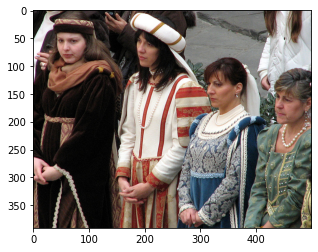

In [15]:
img = mpimg.imread(image_folder+'428512135.jpg')
imgplot = plt.imshow(img)
plt.show()

In [1]:
import torch
torch.cuda.current_device()

AssertionError: 
The NVIDIA driver on your system is too old (found version 9000).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.

In [4]:
from os import listdir
from os.path import isfile, join
image_files = [f for f in listdir(image_folder) if isfile(join(image_folder, f))]
image_files.remove("readme.txt")

In [5]:
phrase_dict = defaultdict(set)
for ct, image_file in enumerate(image_files):
    if ct % 1000 == 0: print(ct)
    name = image_file.split(".")[0]
    a = get_sentence_data(sentence_folder+name+".txt")
    for sent_item in a:
        for phrase_item in sent_item["phrases"]:
            id = str(ct)+"_"+phrase_item["phrase_id"]
            text = phrase_item["phrase"]
            phrase_dict[id].add(text)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000


In [23]:
del phrase_dict['0']

In [25]:
total_phrases = 0
each_entity_number = []

for one_set in phrase_dict.values():
    total_phrases+= len(one_set)
    each_entity_number.append(len(one_set))
print("average number of phrase per entity", total_phrases/len(phrase_dict))

average number of phrase per entity 1.7981091058244463


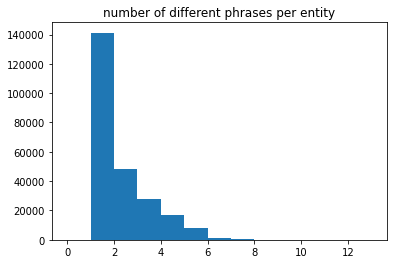

In [31]:
import matplotlib.pyplot as plt
plt.hist(each_entity_number, bins = range(14))
plt.title("number of different phrases per entity")
plt.show()

In [ ]:
each_entity_number.remove(1)
each_entity_number.remove(2)
each_entity_number.remove(3)

### construction

In [10]:
for id in phrase_dict.keys():
    one_set = phrase_dict[id]
    if one_set == {'The man', 'A man', 'The construction worker', 'A construction worker'}:
        print(id)

45_70447
2632_153717


In [11]:
image_files[45]

'2751612533.jpg'

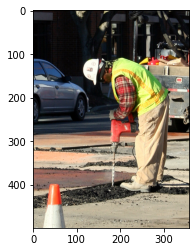

In [13]:
img = mpimg.imread(image_folder+image_files[2632])
imgplot = plt.imshow(img)
plt.show()

In [16]:
a = get_sentence_data(sentence_folder+image_files[2632][:-3]+"txt")
a


[{'sentence': 'The construction worker is drilling into the street near a street with active traffic .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'The construction worker',
    'phrase_id': '153717',
    'phrase_type': ['people']},
   {'first_word_index': 6,
    'phrase': 'the street',
    'phrase_id': '153720',
    'phrase_type': ['scene']},
   {'first_word_index': 9,
    'phrase': 'a street',
    'phrase_id': '153720',
    'phrase_type': ['scene']},
   {'first_word_index': 12,
    'phrase': 'active traffic',
    'phrase_id': '153722',
    'phrase_type': ['vehicles']}]},
 {'sentence': 'The man in the construction gear uses a large , red drill .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'The man',
    'phrase_id': '153717',
    'phrase_type': ['people']},
   {'first_word_index': 3,
    'phrase': 'the construction gear',
    'phrase_id': '153723',
    'phrase_type': ['other']},
   {'first_word_index': 7,
    'phrase': 'a large , red drill',
    'phrase_id': '15372

### athlete

[61]


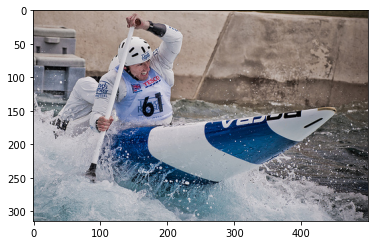

[{'sentence': 'A pair of athletes are in a kayak equipped with protective gear and oars , rowing down a rapid body of water in a blue and white kayak .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'A pair of athletes',
    'phrase_id': '265170',
    'phrase_type': ['people']},
   {'first_word_index': 6,
    'phrase': 'a kayak',
    'phrase_id': '265171',
    'phrase_type': ['other']},
   {'first_word_index': 10,
    'phrase': 'protective gear',
    'phrase_id': '265176',
    'phrase_type': ['other']},
   {'first_word_index': 13,
    'phrase': 'oars',
    'phrase_id': '265175',
    'phrase_type': ['other']},
   {'first_word_index': 17,
    'phrase': 'a rapid body of water',
    'phrase_id': '265172',
    'phrase_type': ['scene']},
   {'first_word_index': 23,
    'phrase': 'a blue and white kayak',
    'phrase_id': '265171',
    'phrase_type': ['other']}]},
 {'sentence': 'Two people kayaking through rough waters in a blue and white kayak .',
  'phrases': [{'first_word_index': 0,

In [20]:
ids = []
for id in phrase_dict.keys():
    one_set = phrase_dict[id]
    if one_set == {'Two people', 'A pair of athletes', 'Competitive kayakers'}:
        ids.append(int(id.split("_")[0]))
print(ids)

img = mpimg.imread(image_folder+image_files[ids[0]])
imgplot = plt.imshow(img)
plt.show()
get_sentence_data(sentence_folder+image_files[ids[0]][:-3]+"txt")

[184]


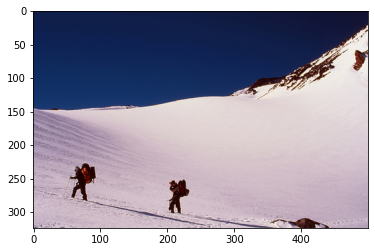

[{'sentence': 'Two mountaineers are walking across a snowcapped mountain .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'Two mountaineers',
    'phrase_id': '113165',
    'phrase_type': ['people']},
   {'first_word_index': 5,
    'phrase': 'a snowcapped mountain',
    'phrase_id': '113166',
    'phrase_type': ['scene']}]},
 {'sentence': 'people with equipment climbing up a snowy mountain',
  'phrases': [{'first_word_index': 0,
    'phrase': 'people',
    'phrase_id': '113165',
    'phrase_type': ['people']},
   {'first_word_index': 2,
    'phrase': 'equipment',
    'phrase_id': '113169',
    'phrase_type': ['other']},
   {'first_word_index': 5,
    'phrase': 'a snowy mountain',
    'phrase_id': '113166',
    'phrase_type': ['scene']}]},
 {'sentence': 'Two hikers with backpacks crossing a snow field .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'Two hikers',
    'phrase_id': '113165',
    'phrase_type': ['people']},
   {'first_word_index': 3,
    'phrase': 'backpacks'

In [21]:
ids = []
for id in phrase_dict.keys():
    one_set = phrase_dict[id]
    if one_set == {'People', 'Two mountaineers', 'people', 'Two hikers'}:
        ids.append(int(id.split("_")[0]))
print(ids)

img = mpimg.imread(image_folder+image_files[ids[0]])
imgplot = plt.imshow(img)
plt.show()
get_sentence_data(sentence_folder+image_files[ids[0]][:-3]+"txt")


In [2]:
["a" * 5]

['aaaaa']